In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [2]:
# read cdc, nutrition, and obesity files from the local drive by using read_csv() and save each as a dataframe
cdc_df = pd.read_csv("cdc.csv")
nutrition_df = pd.read_csv("nutrition.csv")
obesity_df = pd.read_csv("obesity.csv")

In [3]:
# Check first few rows by using head()
cdc_df.head()

,year,quarter,StateCode,State,topicdesc,policytopic,setting,title,status,citation,statusaltvalue,comments,displayorder,policytypeid,healthtopicid,policytopicid,settingid,provisionid,geolocation
0,2010,1,NY,New York,Obesity,Incentives,Community,State Fiscal Plan,Dead,S6610,3,(Abstract - Enacts into law major components o...,38,LEG,002OB,029INC,002COM,1641,"(42.827001032, -75.543970427)"
1,2011,1,WV,West Virginia,Nutrition,Appropriations,Community,Sales Tax on Food,Dead,H2977,3,(Abstract - Eliminates the sales tax on food e...,2,LEG,001NUT,002APP,002COM,4781,"(38.665510202, -80.712640135)"
2,2011,1,MA,Massachusetts,Physical Activity,Built Environment and Street-Scale Design,Community,Pedestrian Safety,Dead,SD19,3,"(Abstract - Relates to pedestrian safety. ),...",68,LEG,003PA,049BED,002COM,4090,"(42.27687047, -72.082690675)"
3,2010,1,NC,North Carolina,Obesity,Menu Labeling,Community,Governors Budget,Dead,H1793,3,"(Abstract - Concerns governors budget. ), (Bil...",41,LEG,002OB,032MNL,002COM,2908,"(35.466220975, -79.159250463)"
4,2011,1,FL,Florida,Physical Activity,"Parks, Recreation and Trails",School/After School,Chronic Diseases<br>,Dead,S526,3,"(Abstract - ""Creates the chronic disease preve...",59,LEG,003PA,034PRT,004SAS,5615,"(28.932040377, -81.928960539)"


In [4]:
# Check first few rows by using head()
nutrition_df.head()

,LocationState,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,QuestionID,LocationID,StratificationCategory,Stratification
0,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,"(32.84057112200048, -86.63186076199969)",OWS,Q036,1,Total,Total
1,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,"(32.84057112200048, -86.63186076199969)",OWS,Q036,1,Gender,Male
2,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,"(32.84057112200048, -86.63186076199969)",OWS,Q036,1,Gender,Female
3,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,"(32.84057112200048, -86.63186076199969)",OWS,Q036,1,Education,Less than high school
4,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,"(32.84057112200048, -86.63186076199969)",OWS,Q036,1,Education,High school graduate


In [5]:
# Check first few rows by using head()
obesity_df.head()

,"States, district, & territories",Obesity rank,Obese adults (2000),Obese adults (2020),Overweight adults (2000),Obese children and adolescents (2000)
0,Alabama,5,30.1,36.3,65.4,16.7
1,Alaska,9,27.3,34.2,64.5,11.1
2,Arizona,30,23.3,29.5,59.5,12.2
3,Arkansas,7,28.1,35.0,64.7,16.4
4,California,48,23.1,25.1,59.4,13.2


In [6]:
# Change the headings of the data frames to appropriate names 
cdc_df.rename(columns= {"topicdesc": "Topic"}, inplace=True)
obesity_df.rename(columns= {"States, district, & territories": "State"}, inplace=True)
nutrition_df.rename(columns= {"LocationState": "State", "Class": "Topic"}, inplace=True)

In [7]:
# check the column names of the cdc_df dataframe
cdc_df.columns

Index(['year', 'quarter', 'StateCode', 'State', 'Topic', 'policytopic',
       'setting', 'title', 'status', 'citation', 'statusaltvalue', 'comments',
       'displayorder', 'policytypeid', 'healthtopicid', 'policytopicid',
       'settingid', 'provisionid', 'geolocation'],
      dtype='object')

In [8]:
# check the column names of the obesity_df dataframe
obesity_df.columns

Index(['State', 'Obesity rank', 'Obese adults (2000)', 'Obese adults (2020)',
       'Overweight adults (2000)', 'Obese children and adolescents (2000)'],
      dtype='object')

In [9]:
# check the column names of the nutrition_df dataframe
nutrition_df.columns

Index(['State', 'Topic', 'Question', 'Data_Value', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'GeoLocation', 'ClassID',
       'QuestionID', 'LocationID', 'StratificationCategory', 'Stratification'],
      dtype='object')

In [10]:
# The values in the Topic columns were different for nutrition_df and cdc_df 
# Changed the values "Obesity / Weight Status" to "Obesity" in nutrition_df to match with cdc_df 
nutrition_df.Topic.mask(nutrition_df.Topic == 'Obesity / Weight Status', 'Obesity', inplace=True)

In [11]:
# The values in the Topic columns were different for nutrition_df and cdc_df 
# Changed the values "Fruits and Vegetables" to "Nutrition" in nutrition_df to match with cdc_df 
nutrition_df.Topic.mask(nutrition_df.Topic == 'Fruits and Vegetables', 'Nutrition', inplace=True)

In [38]:
# Create connection with milestone5 database
conn = sqlite3.connect("obesity.db")

In [39]:
# load the three tables to milestone5 database using three data frames using to_sql()
cdc_df.to_sql('cdc', conn)
obesity_df.to_sql('obesity', conn)
nutrition_df.to_sql('nutrition', conn)

In [40]:
# Execute query to list the tables in the database 
rows = conn.execute('SELECT name FROM sqlite_master WHERE type ="table" AND name NOT LIKE "sqlite_%";')

In [41]:
# Print the result of query to confirm all three tables were created
for row in rows:
    print(row)

('cdc',)
('obesity',)
('nutrition',)


In [42]:
# print total number of rows in the cdc table to confirm that cdc table is loaded with all records
rows = conn.execute('SELECT count(*) FROM cdc')

In [43]:
for row in rows:
    print(row)

(1000,)


In [44]:
# print total number of rows in the cdc table to confirm that obesity table is loaded with all records
rows = conn.execute('SELECT count(*) FROM obesity')

In [45]:
for row in rows:
    print(row)

(51,)


In [46]:
# print total number of rows in the cdc table to confirm that nutrition table is loaded with all records
rows = conn.execute('SELECT count(*) FROM nutrition')

In [47]:
for row in rows:
    print(row)

(44958,)


In [48]:
# SQL query will create one "combined" table which joins three tables by using "state" and "Topic" variable 
# cdc and nutrition tables are joined by using "State" and "Topic" variables
# cdc and obesity tables are joined by using "State" variable 
query = '''
        CREATE TABLE combined AS   
        SELECT * FROM nutrition 
        JOIN cdc ON cdc.State = nutrition.State 
        AND cdc.Topic = nutrition.Topic 
        JOIN obesity ON obesity.State = cdc.State
        '''

In [49]:
# execute the above query
rows = conn.execute(query)

In [50]:
# Print total number of rows in the combined table to determine how many rows were created through join
rows = conn.execute('SELECT count(*) FROM combined')

In [51]:
for row in rows:
    print(row)

(247850,)


In [52]:
# Commit the data to the database
conn.commit()

In [53]:
# Extract the combined table to the dataframe
combined_df = pd.read_sql('SELECT * FROM combined', conn)

In [54]:
# check for total rows and columns in combined dataframe
combined_df.shape

(247850, 41)

In [55]:
# close the connection to database
conn.close()

In [56]:
# Check the columns of combined_df
combined_df.columns

Index(['index', 'State', 'Topic', 'Question', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'GeoLocation', 'ClassID', 'QuestionID', 'LocationID',
       'StratificationCategory', 'Stratification', 'index:1', 'year',
       'quarter', 'StateCode', 'State:1', 'Topic:1', 'policytopic', 'setting',
       'title', 'status', 'citation', 'statusaltvalue', 'comments',
       'displayorder', 'policytypeid', 'healthtopicid', 'policytopicid',
       'settingid', 'provisionid', 'geolocation:1', 'index:2', 'State:2',
       'Obesity rank', 'Obese adults (2000)', 'Obese adults (2020)',
       'Overweight adults (2000)', 'Obese children and adolescents (2000)'],
      dtype='object')

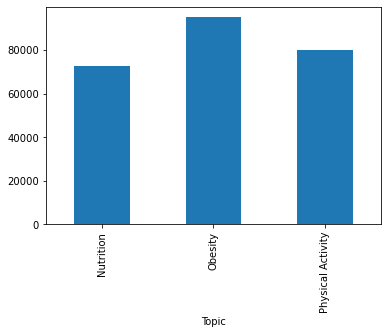

In [57]:
# Bar graph for the Topic variable
combined_df.groupby('Topic').size().plot(kind='bar')

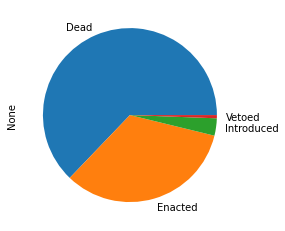

In [58]:
# Pie graph for the status variable
combined_df.groupby('status').size().plot(kind='pie')

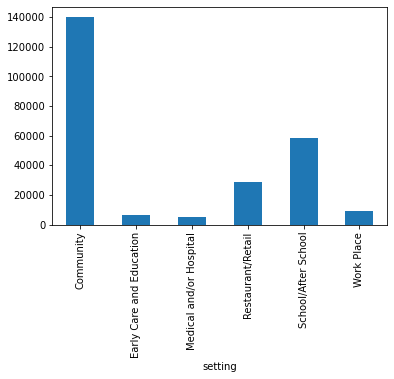

In [59]:
# Bar graph for the setting variable
combined_df.groupby('setting').size().plot(kind='bar')

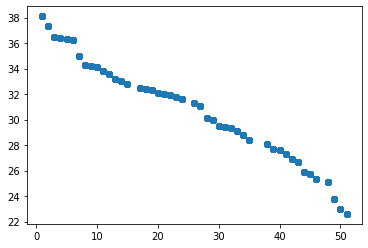

In [60]:
# Scatter plot between obesity rank and Obese Adults in 2020. The relationship is strong negative as expected, since 
# the rank to the state was given based on the number of obese people in the state. 
plt.scatter(combined_df['Obesity rank'], combined_df['Obese adults (2020)'])

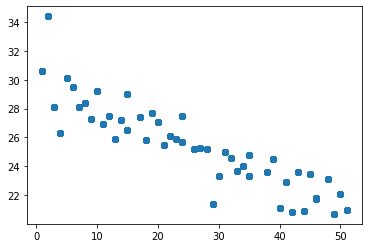

In [61]:
# Scatter plot between obesity rank and Obese Adults in 2000. The relationship was expected to be strong negative 
# similar to Obese adults in 2020, but the data points are not in straight line. Which means, the obesity numbers
# changed from 2000 to 2020.
plt.scatter(combined_df['Obesity rank'], combined_df['Obese adults (2000)'])

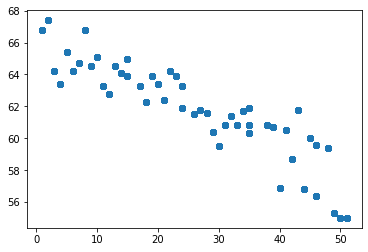

In [62]:
# Scatter plot between obesity rank and Overweight Adults in 2000. The relationship was expected to be strong negative 
# similar to Obese adults in 2020, but the data points are not in straight line. Which means, the overweight numbers
# are not in the same proportion as obese numbers.
plt.scatter(combined_df['Obesity rank'], combined_df['Overweight adults (2000)'])

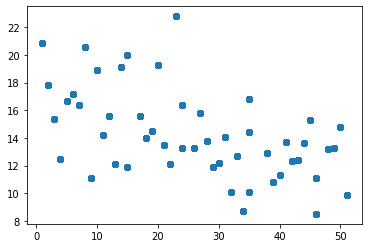

In [63]:
# Scatter plot between obesity rank and Obese children and adolescents in 2000. The relationship was expected to be 
# strong negative # similar to Obese adults in 2020, but the data points are spread all over. Which means, the number of
# Obese children and adolescents is not in proportion of number of obese adults.
plt.scatter(combined_df['Obesity rank'], combined_df['Obese children and adolescents (2000)'])